In [2]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

import sys
import paths
sys.path.append(paths.scripts_root)
import util

%load_ext autoreload
%autoreload 2

# Display entire width of browser
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))
print("Paths:")
for k,v in paths.path.items():
    print(" path.%s: %s" % (k,v))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Paths:
 path.projects_root: /Users/trafferty/data/projects
 path.scripts_root: /Users/trafferty/data/scripts
 path.tmp_dir: /Users/trafferty/data/tmp
 path.images_root: /Users/trafferty/data/images
 path.notebook_root: /Users/trafferty/data/notebooks
 path.results_root: /Users/trafferty/data/results


### Read in an image, some anotation, plotting

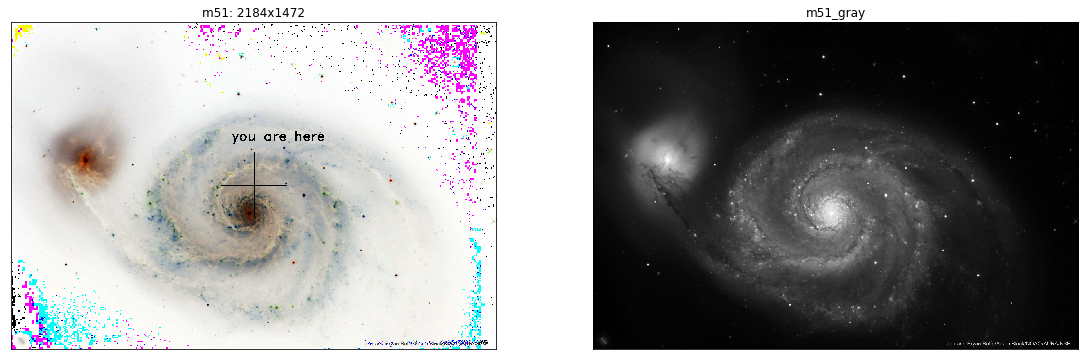

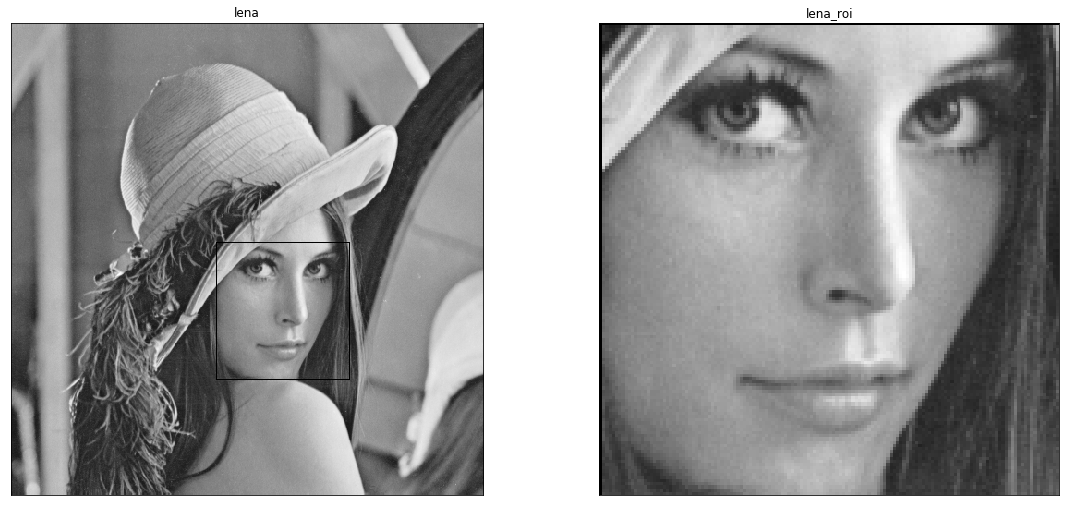

In [2]:
m51 = cv2.imread(paths.images_root+'/m51.jpg' ,cv2.IMREAD_COLOR)
m51_gray = cv2.cvtColor(m51, cv2.COLOR_BGR2GRAY)
green = (0, 255, 0)

lena = cv2.imread(paths.images_root+'/lena-16g.png',cv2.IMREAD_GRAYSCALE)
lena_roi = lena[238:386, 222:366]  #np slice: [startY:endY, startX:endX]
cv2.rectangle(lena, (222, 238), (366, 386), green, 1) # two corners: (startX, startY), (endX, endY)

rows, cols, channels = m51.shape
midX, midY = int(cols/2), int(rows/2)
l = int(min([rows,cols]) * 0.1)
cv2.line(m51, (midX, midY-l), (midX, midY+l), green, 3)
cv2.line(m51, (midX-l, midY), (midX+l, midY), green, 3)
cv2.putText(m51, "you are here", (midX-100, midY-200), cv2.FONT_HERSHEY_DUPLEX, 2, green, 3)

util.plot_imgs([(m51,'m51: %dx%d' % (cols,rows)), (m51_gray, 'm51_gray'), 
            (lena, 'lena'), (lena_roi, 'lena_roi')], max_cols = 2)